#Данные

In [ ]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

In [ ]:
x, y = make_moons(n_samples=500, noise=0.2, random_state=40)

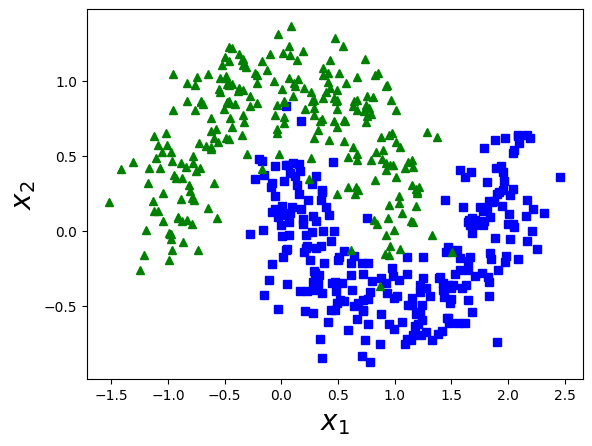

In [ ]:
plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs")
plt.plot(x[:, 0][y==0], x[:, 1][y==0], "g^")

plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from mlxtend.plotting import plot_decision_regions

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=40, test_size=0.2)

In [ ]:
import pandas as pd
df_out = pd.DataFrame({'Classifier':[], 'Accuracy':[], 'F1-score':[], 'ROC_AUC':[]})

def add_record(df, classifier, acc, f1, rocauc):
  if classifier in df.Classifier.unique():
    index = df.index[df.Classifier == classifier].tolist()
    for i in index:
      df.at[i, 'Accuracy'] = acc
      df.at[i, 'F1-score'] = f1
      df.at[i, 'ROC_AUC'] = rocauc
  else:
    d = pd.DataFrame({'Classifier': [classifier], 'Accuracy': [acc], 'F1-score':[f1], 'ROC_AUC':[rocauc]})
    df = pd.concat([df, d], axis=0, ignore_index = True)
  return df

#Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression().fit(x_train, y_train)

lr_preds = lr_clf.predict(x_test)
print(lr_clf.predict_proba([x_test[0,:]]))
acc = accuracy_score(lr_preds, y_test)
f1 = f1_score(lr_preds, y_test)
rocauc = roc_auc_score(lr_preds, y_test)

[[0.91700363 0.08299637]]


Logistic Regression
Accuracy:  0.87
f1:  0.888888888888889
rocauc:  0.8649425287356322


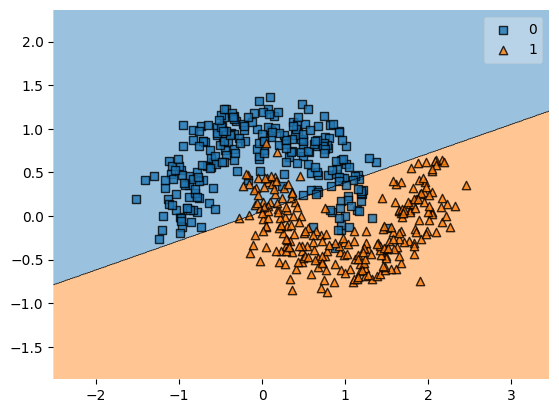

In [ ]:
from mlxtend.plotting import plot_decision_regions

print('Logistic Regression')
print('Accuracy: ', acc)
print('f1: ', f1)
print('rocauc: ', rocauc)
df_out = add_record(df_out, 'Logistic Regression', acc, f1, rocauc)
plot_decision_regions(x, y, clf=lr_clf);

#kNN k-nearest-neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)

knn_preds = knn_clf.predict(x_test)
acc = accuracy_score(knn_preds, y_test)
f1 = f1_score(knn_preds, y_test)
rocauc = roc_auc_score(knn_preds, y_test)

kNN
Accuracy:  1.0
f1:  1.0
rocauc:  1.0


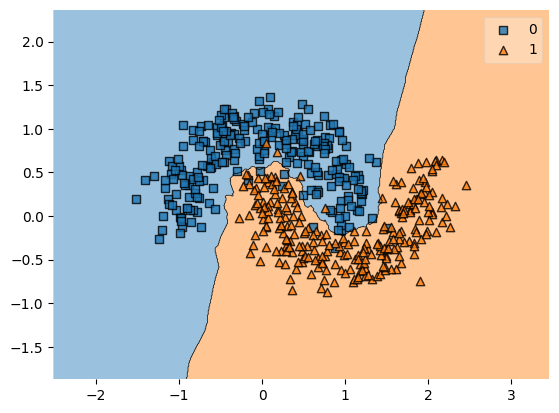

In [ ]:
print('kNN')
print('Accuracy: ', acc)
print('f1: ', f1)
print('rocauc: ', rocauc)
df_out = add_record(df_out, 'kNN', acc, f1, rocauc)
plot_decision_regions(x, y, clf=knn_clf);

In [ ]:
knn_preds = knn_clf.predict(x_train)
print(accuracy_score(knn_preds, y_train))
print(f1_score(knn_preds, y_train))
print(roc_auc_score(knn_preds, y_train))

0.97
0.9689119170984456
0.9697310819262039


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=20).fit(x_train, y_train)

dt_preds = dt_clf.predict(x_test)
acc = accuracy_score(dt_preds, y_test)
f1 = f1_score(dt_preds, y_test)
rocauc = roc_auc_score(dt_preds, y_test)

Desicion Tree
Accuracy:  1.0
f1:  1.0
rocauc:  1.0


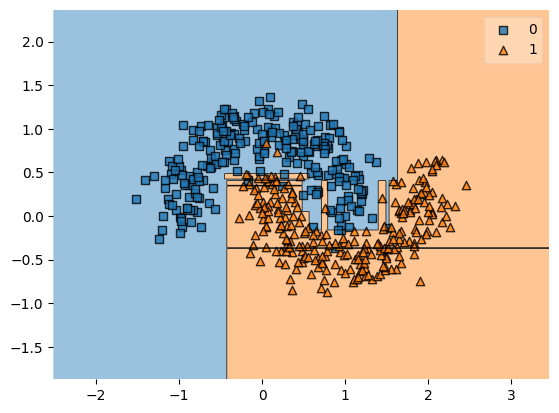

In [ ]:
print('Desicion Tree')
print('Accuracy: ', acc)
print('f1: ', f1)
print('rocauc: ', rocauc)
df_out = add_record(df_out, 'Decision tree', acc, f1, rocauc)
plot_decision_regions(x, y, clf=dt_clf);

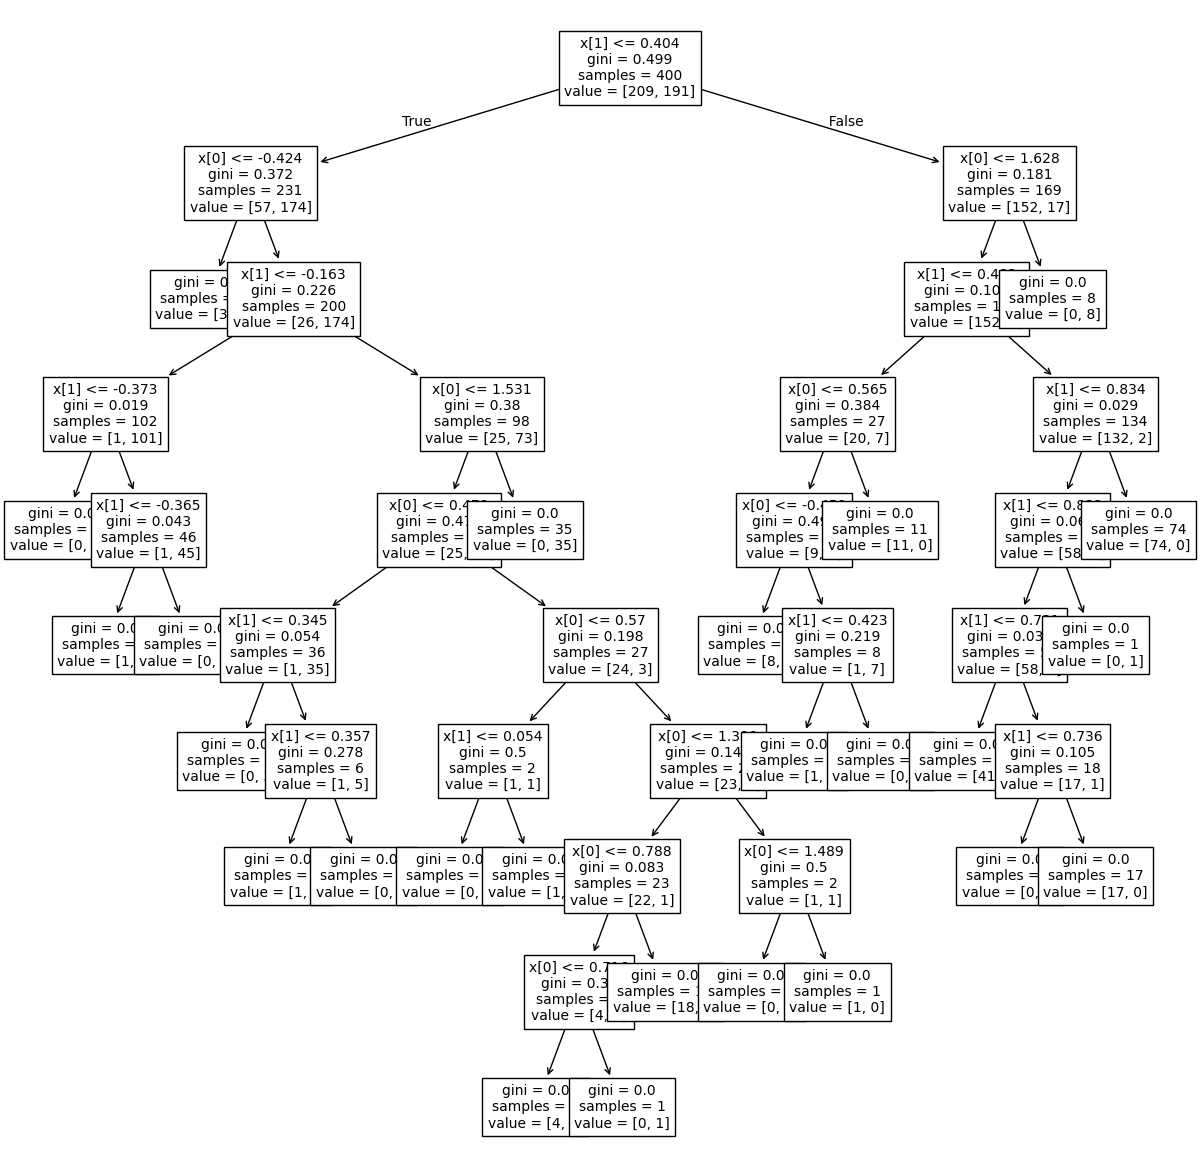

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(dt_clf, fontsize=10);

#Random Forest Clasisfier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Обучим модель случайного леса
rf_clf = RandomForestClassifier(n_estimators= 100).fit(x_train, y_train)

dt_preds = dt_clf.predict(x_test)
acc = accuracy_score(dt_preds, y_test)
f1 = f1_score(dt_preds, y_test)
rocauc = roc_auc_score(dt_preds, y_test)

Random Forest
Accuracy:  1.0
f1:  1.0
rocauc:  1.0


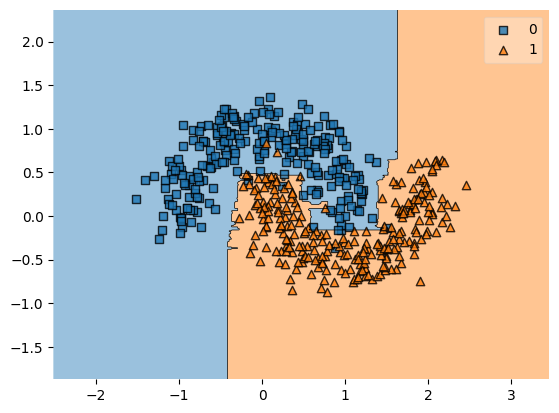

In [ ]:
print('Random Forest')
print('Accuracy: ', acc)
print('f1: ', f1)
print('rocauc: ', rocauc)
df_out = add_record(df_out, 'Random Forest', acc, f1, rocauc)
plot_decision_regions(x, y, clf=rf_clf);

#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0).fit(x_train, y_train)
gb_preds = gb_clf.predict(x_test)
acc = accuracy_score(gb_preds, y_test)
f1 = f1_score(gb_preds, y_test)
rocauc = roc_auc_score(gb_preds, y_test)

Gradient boosting
Accuracy:  0.99
f1:  0.9914529914529915
rocauc:  0.988095238095238


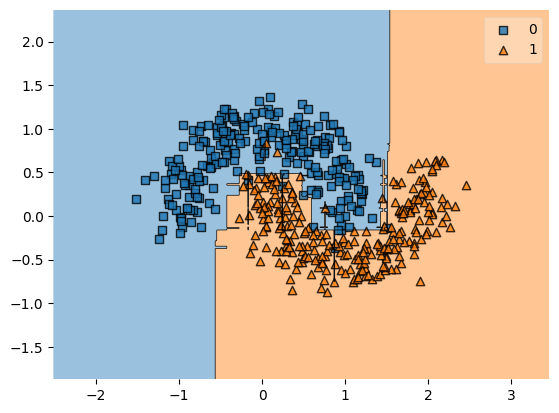

In [ ]:
print('Gradient boosting')
print('Accuracy: ', acc)
print('f1: ', f1)
print('rocauc: ', rocauc)
df_out = add_record(df_out, 'Gradient boosting', acc, f1, rocauc)
plot_decision_regions(x, y, clf=gb_clf);

#Stohastic Gradient Descend

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=10000, tol=1e-6, learning_rate='adaptive', eta0=1e-8).fit(x_train, y_train)
sgd_preds = sgd_clf.predict(x_test)
acc = accuracy_score(sgd_preds, y_test)
f1 = f1_score(sgd_preds, y_test)
rocauc = roc_auc_score(sgd_preds, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGD
Accuracy:  0.84
f1:  0.864406779661017
rocauc:  0.8346424142207525


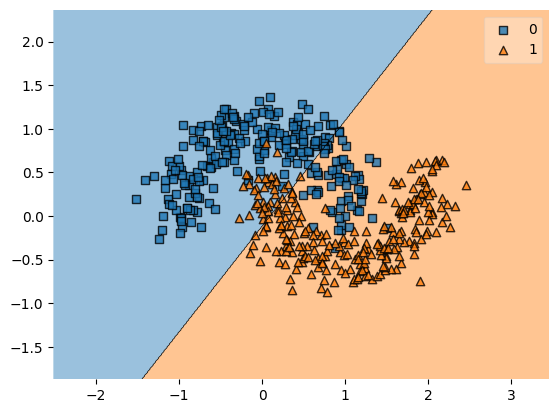

In [ ]:
print('SGD')
print('Accuracy: ', acc)
print('f1: ', f1)
print('rocauc: ', rocauc)
df_out = add_record(df_out, 'SGD', acc, f1, rocauc)
plot_decision_regions(x, y, clf=sgd_clf);

#SVM Support Vectors Machine

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf', gamma=1.7).fit(x_train, y_train)

sgd_preds = svm_clf.predict(x_test)
acc = accuracy_score(sgd_preds, y_test)
f1 = f1_score(sgd_preds, y_test)
rocauc = roc_auc_score(sgd_preds, y_test)

SVM
Accuracy:  1.0
f1:  1.0
rocauc:  1.0


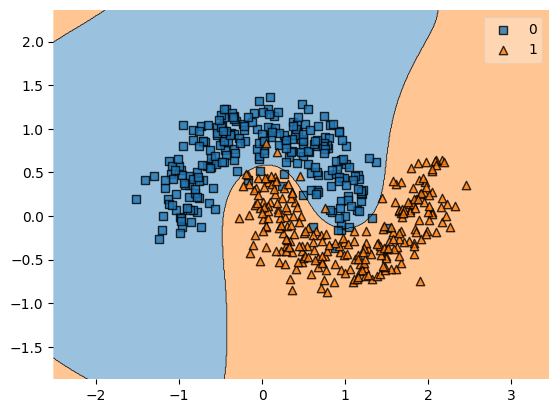

In [ ]:
print('SVM')
print('Accuracy: ', acc)
print('f1: ', f1)
print('rocauc: ', rocauc)
df_out = add_record(df_out, 'SVM', acc, f1, rocauc)
plot_decision_regions(x, y, clf=svm_clf);

In [ ]:
df_out.head(10)

,Classifier,Accuracy,F1-score,ROC_AUC
0,Logistic Regression,0.87,0.888889,0.864943
1,kNN,1.00,1.000000,1.000000
2,Decision tree,0.99,0.991453,0.988095
3,Random Forest,0.99,0.991453,0.988095
4,Gradient boosting,0.98,0.982759,0.976744
5,SGD,0.84,0.864407,0.834642
6,SVM,1.00,1.000000,1.000000
